# Hacer funcionar el MCMC de METROPOLIS

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [27]:
np.random.seed(20)
#CREACION DE DATOS

#parametros
Npasos=1000

#valores iniciales
m=0.9
b=0.7

#datos
x= np.random.random(Npasos)
y= m*x+b
yerr= np.random.rand(Npasos)*0.2

#sigmas
sigm= 0.01 
sigb= 0.02

mlist=[]
blist=[]


mlist.append(m)
blist.append(b)
cont=0

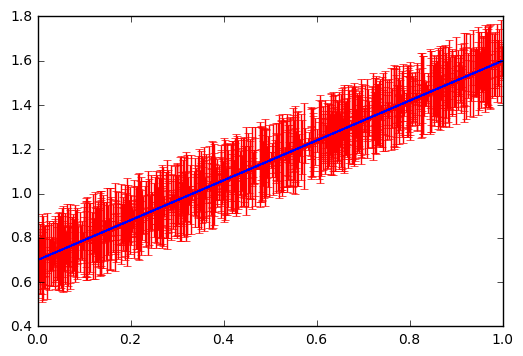

In [28]:
plt.errorbar(x, y, yerr, fmt='.', color='r')
plt.plot(x,y, color='b')
plt.show()

In [29]:
np.random.seed(0)
#prior 
def prior(m,b):
    if ((0 < m <1.) and (0< b <1.)):
        p = 0.
        return p 
    else:
        p = -np.infty
        return p
    return p

#modelo
def mod(x,m,b):    
    return m*x+b

#likelihood
def likeli(m,b):
    xi2=(((y-mod(x,m,b))**2)/yerr**2).sum()
    return xi2


In [30]:
np.random.seed(2)
for i in range(Npasos):
    
    m0=mlist[-1]
    b0=mlist[-1]
    
    mn= np.random.normal(m0, sigm)
    bn= np.random.normal(b0, sigb)
    
    if (prior(mn,bn)):
        mn=m
        bn=b
    
    probn= likeli(mn,bn)
    prob0= likeli(m,b)
    rest=  probn-prob0
    
    if rest>0:
        
        mlist.append(mn)
        blist.append(bn)
        cont+=1
    else:
        exp=np.exp(rest/2)
        ptest=np.random.uniform(0.,1.)
        
        if exp> ptest:

            mlist.append(mn)
            blist.append(bn)
            cont+=1
        else:

            mlist.append(m0)
            blist.append(b0)
            
            
    

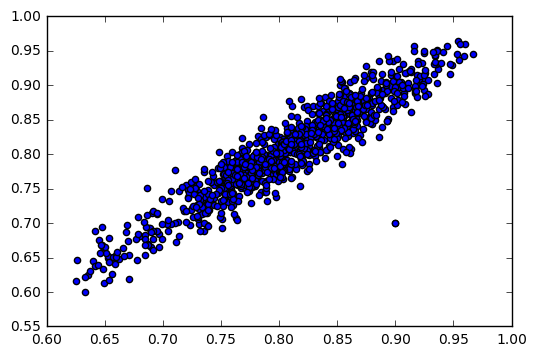

In [31]:
plt.scatter(mlist,blist)
plt.show()